In [1]:
import acquire
import prep
import pandas as pd
import re
import unicodedata
import nltk
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json('data.json')

In [3]:
data.head()

,repo,language,readme_contents
0,freeCodeCamp/chapter,TypeScript,# Welcome to Chapter\n[![All Contributors](htt...
1,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
2,freeCodeCamp/nginx-config,None,# nginx-config\n\nConfig for our NGINX instanc...
3,freeCodeCamp/chat-config,HTML,Usage:\n\n1. Create a .env\n\n ```txt\n RO...
4,freeCodeCamp/devdocs,Ruby,# [DevDocs](https://devdocs.io) — API Document...


In [4]:
data.isnull().sum()

repo               0
language           8
readme_contents    6
dtype: int64

In [5]:
data = data.dropna()
data.head()

,repo,language,readme_contents
0,freeCodeCamp/chapter,TypeScript,# Welcome to Chapter\n[![All Contributors](htt...
1,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
3,freeCodeCamp/chat-config,HTML,Usage:\n\n1. Create a .env\n\n ```txt\n RO...
4,freeCodeCamp/devdocs,Ruby,# [DevDocs](https://devdocs.io) — API Document...
5,freeCodeCamp/news-theme,Handlebars,![freeCodeCamp.org Social Banner](https://s3.a...


In [6]:
df = prep.prep_data(data, 'readme_contents', extra_words=['&#9;'], exclude_words=[])

In [7]:
df.head()

,repo,language,readme_contents,stemmed,lemmatized,clean
0,freeCodeCamp/chapter,TypeScript,# Welcome to Chapter\n[![All Contributors](htt...,welcom to chapter all contributorshttpsimgshie...,welcome to chapter all contributorshttpsimgshi...,welcome chapter contributorshttpsimgshieldsiob...
1,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...
3,freeCodeCamp/chat-config,HTML,Usage:\n\n1. Create a .env\n\n ```txt\n RO...,usag 1 creat a env txt rocketchat_versionlates...,usage 1 create a env txt rocketchat_versionlat...,usage 1 create env txt rocketchat_versionlates...
4,freeCodeCamp/devdocs,Ruby,# [DevDocs](https://devdocs.io) — API Document...,devdocshttpsdevdocsio api document browser bui...,devdocshttpsdevdocsio api documentation browse...,devdocshttpsdevdocsio api documentation browse...
5,freeCodeCamp/news-theme,Handlebars,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...


In [8]:
df.language.value_counts()

JavaScript    50
Python        13
HTML          12
CSS            6
Shell          3
Ruby           2
TypeScript     2
R              2
Handlebars     1
SCSS           1
Name: language, dtype: int64

In [9]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.clean]
language_df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [10]:
language_df

,repo,language,readme_contents,stemmed,lemmatized,clean,words
0,freeCodeCamp/chapter,TypeScript,# Welcome to Chapter\n[![All Contributors](htt...,welcom to chapter all contributorshttpsimgshie...,welcome to chapter all contributorshttpsimgshi...,welcome chapter contributorshttpsimgshieldsiob...,"[welcome, chapter, contributorshttpsimgshields..."
1,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,"[freecodecamporg, social, bannerhttpss3amazona..."
2,NaN,NaN,NaN,NaN,NaN,NaN,"[usagecreate, env, txt, rocketchatversionlates..."
3,freeCodeCamp/chat-config,HTML,Usage:\n\n1. Create a .env\n\n ```txt\n RO...,usag 1 creat a env txt rocketchat_versionlates...,usage 1 create a env txt rocketchat_versionlat...,usage 1 create env txt rocketchat_versionlates...,"[devdocshttpsdevdocsio, api, documentation, br..."
4,freeCodeCamp/devdocs,Ruby,# [DevDocs](https://devdocs.io) — API Document...,devdocshttpsdevdocsio api document browser bui...,devdocshttpsdevdocsio api documentation browse...,devdocshttpsdevdocsio api documentation browse...,"[freecodecamporg, social, bannerhttpss3amazona..."
...,...,...,...,...,...,...,...
100,freeCodeCamp/terms-of-service,CSS,### [freeCodeCamp](https://freecodecamp.com)'s...,freecodecamphttpsfreecodecampcom term of servi...,freecodecamphttpsfreecodecampcoms term of serv...,freecodecamphttpsfreecodecampcoms term service...,NaN
101,freeCodeCamp/outreach-for-good,JavaScript,# Outreach for Good\n**Student absenteeism and...,outreach for good student absente and outreach...,outreach for good student absenteeism and outr...,outreach good student absenteeism outreach tra...,NaN
102,freeCodeCamp/gatsby-source-filesystem,JavaScript,# gatsby-source-filesystem\n\nPlugin for creat...,gatsbysourcefilesystem plugin for creat file n...,gatsbysourcefilesystem plugin for creating fil...,gatsbysourcefilesystem plugin creating file no...,NaN
103,freeCodeCamp/jamstack-hackathon,CSS,# Welcome to freeCodeCamp's About page\n\nThis...,welcom to freecodecamp about page thi is a sim...,welcome to freecodecamps about page this is a ...,welcome freecodecamps page simple static websi...,NaN


In [11]:
language_df.isnull().sum()

repo               13
language           13
readme_contents    13
stemmed            13
lemmatized         13
clean              13
words              13
dtype: int64

In [12]:
language_df = language_df.dropna()

In [13]:
language_df.isnull().sum()

repo               0
language           0
readme_contents    0
stemmed            0
lemmatized         0
clean              0
words              0
dtype: int64

In [14]:
language_df.language.value_counts()

JavaScript    41
Python        13
HTML          11
Shell          3
CSS            3
Ruby           2
TypeScript     2
R              2
Handlebars     1
SCSS           1
Name: language, dtype: int64

In [15]:
language_df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in language_df.words]
language_df.head()

<ipython-input-15-41bf2eae8520>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in language_df.words]


,repo,language,readme_contents,stemmed,lemmatized,clean,words,bigrams
0,freeCodeCamp/chapter,TypeScript,# Welcome to Chapter\n[![All Contributors](htt...,welcom to chapter all contributorshttpsimgshie...,welcome to chapter all contributorshttpsimgshi...,welcome chapter contributorshttpsimgshieldsiob...,"[welcome, chapter, contributorshttpsimgshields...","[(welcome, chapter), (chapter, contributorshtt..."
1,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,"[freecodecamporg, social, bannerhttpss3amazona...","[(freecodecamporg, social), (social, bannerhtt..."
3,freeCodeCamp/chat-config,HTML,Usage:\n\n1. Create a .env\n\n ```txt\n RO...,usag 1 creat a env txt rocketchat_versionlates...,usage 1 create a env txt rocketchat_versionlat...,usage 1 create env txt rocketchat_versionlates...,"[devdocshttpsdevdocsio, api, documentation, br...","[(devdocshttpsdevdocsio, api), (api, documenta..."
4,freeCodeCamp/devdocs,Ruby,# [DevDocs](https://devdocs.io) — API Document...,devdocshttpsdevdocsio api document browser bui...,devdocshttpsdevdocsio api documentation browse...,devdocshttpsdevdocsio api documentation browse...,"[freecodecamporg, social, bannerhttpss3amazona...","[(freecodecamporg, social), (social, bannerhtt..."
5,freeCodeCamp/news-theme,Handlebars,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,"[master, branch, build, statushttpstravisciorg...","[(master, branch), (branch, build), (build, st..."


In [16]:
language_df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in language_df.words]
language_df.head()

<ipython-input-16-b0658a0feb17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in language_df.words]


,repo,language,readme_contents,stemmed,lemmatized,clean,words,bigrams,trigrams
0,freeCodeCamp/chapter,TypeScript,# Welcome to Chapter\n[![All Contributors](htt...,welcom to chapter all contributorshttpsimgshie...,welcome to chapter all contributorshttpsimgshi...,welcome chapter contributorshttpsimgshieldsiob...,"[welcome, chapter, contributorshttpsimgshields...","[(welcome, chapter), (chapter, contributorshtt...","[(welcome, chapter, contributorshttpsimgshield..."
1,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,"[freecodecamporg, social, bannerhttpss3amazona...","[(freecodecamporg, social), (social, bannerhtt...","[(freecodecamporg, social, bannerhttpss3amazon..."
3,freeCodeCamp/chat-config,HTML,Usage:\n\n1. Create a .env\n\n ```txt\n RO...,usag 1 creat a env txt rocketchat_versionlates...,usage 1 create a env txt rocketchat_versionlat...,usage 1 create env txt rocketchat_versionlates...,"[devdocshttpsdevdocsio, api, documentation, br...","[(devdocshttpsdevdocsio, api), (api, documenta...","[(devdocshttpsdevdocsio, api, documentation), ..."
4,freeCodeCamp/devdocs,Ruby,# [DevDocs](https://devdocs.io) — API Document...,devdocshttpsdevdocsio api document browser bui...,devdocshttpsdevdocsio api documentation browse...,devdocshttpsdevdocsio api documentation browse...,"[freecodecamporg, social, bannerhttpss3amazona...","[(freecodecamporg, social), (social, bannerhtt...","[(freecodecamporg, social, bannerhttpss3amazon..."
5,freeCodeCamp/news-theme,Handlebars,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,"[master, branch, build, statushttpstravisciorg...","[(master, branch), (branch, build), (build, st...","[(master, branch, build), (branch, build, stat..."


In [17]:
language_df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in language_df.words]
language_df.head()

<ipython-input-17-60fd61ed460a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in language_df.words]


,repo,language,readme_contents,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,freeCodeCamp/chapter,TypeScript,# Welcome to Chapter\n[![All Contributors](htt...,welcom to chapter all contributorshttpsimgshie...,welcome to chapter all contributorshttpsimgshi...,welcome chapter contributorshttpsimgshieldsiob...,"[welcome, chapter, contributorshttpsimgshields...","[(welcome, chapter), (chapter, contributorshtt...","[(welcome, chapter, contributorshttpsimgshield...","[(welcome, chapter, contributorshttpsimgshield..."
1,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,"[freecodecamporg, social, bannerhttpss3amazona...","[(freecodecamporg, social), (social, bannerhtt...","[(freecodecamporg, social, bannerhttpss3amazon...","[(freecodecamporg, social, bannerhttpss3amazon..."
3,freeCodeCamp/chat-config,HTML,Usage:\n\n1. Create a .env\n\n ```txt\n RO...,usag 1 creat a env txt rocketchat_versionlates...,usage 1 create a env txt rocketchat_versionlat...,usage 1 create env txt rocketchat_versionlates...,"[devdocshttpsdevdocsio, api, documentation, br...","[(devdocshttpsdevdocsio, api), (api, documenta...","[(devdocshttpsdevdocsio, api, documentation), ...","[(devdocshttpsdevdocsio, api, documentation, b..."
4,freeCodeCamp/devdocs,Ruby,# [DevDocs](https://devdocs.io) — API Document...,devdocshttpsdevdocsio api document browser bui...,devdocshttpsdevdocsio api documentation browse...,devdocshttpsdevdocsio api documentation browse...,"[freecodecamporg, social, bannerhttpss3amazona...","[(freecodecamporg, social), (social, bannerhtt...","[(freecodecamporg, social, bannerhttpss3amazon...","[(freecodecamporg, social, bannerhttpss3amazon..."
5,freeCodeCamp/news-theme,Handlebars,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,"[master, branch, build, statushttpstravisciorg...","[(master, branch), (branch, build), (build, st...","[(master, branch, build), (branch, build, stat...","[(master, branch, build, statushttpstraviscior..."


In [18]:
java_words = ' '.join(language_df[language_df.language=='JavaScript'].clean)
python_words = ' '.join(language_df[language_df.language=='Python'].clean)
other_words = ' '.join(language_df[(language_df.language!='Python') & (language_df.language!='JavaScript')].clean)

java_words = re.sub(r'\s.\s', '', java_words)
python_words = re.sub(r'\s.\s', '', python_words)
other_words = re.sub(r'\s.\s', '', other_words)

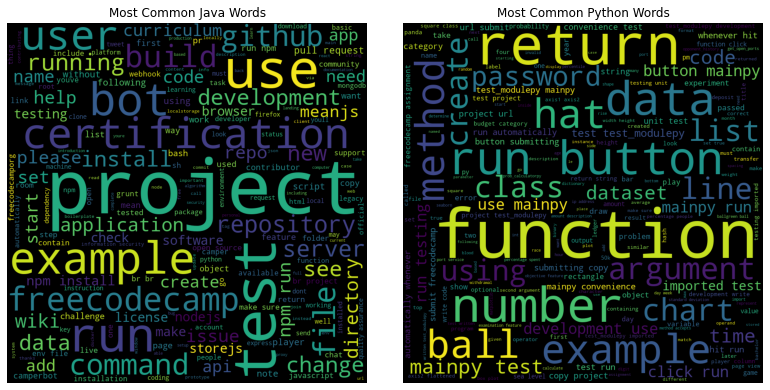

In [19]:
from wordcloud import WordCloud

java_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(java_words)

python_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(python_words)


plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(java_cloud)
axs[1].imshow(python_cloud)

axs[0].set_title('Most Common Java Words')
axs[1].set_title('Most Common Python Words')

for ax in axs: ax.axis('off')

In [20]:
java_bigrams = pd.Series(list(nltk.ngrams(java_words.split(), 2))).value_counts().head(10)
python_bigrams = pd.Series(list(nltk.ngrams(python_words.split(), 2))).value_counts().head(10)
other_bigrams = pd.Series(list(nltk.ngrams(other_words.split(), 2))).value_counts().head(10)
java_trigrams = pd.Series(list(nltk.ngrams(java_words.split(), 3))).value_counts().head(10)
python_trigrams = pd.Series(list(nltk.ngrams(python_words.split(), 3))).value_counts().head(10)
other_trigrams = pd.Series(list(nltk.ngrams(other_words.split(), 3))).value_counts().head(10)
java_fourgrams = pd.Series(list(nltk.ngrams(java_words.split(), 4))).value_counts().head(10)
python_fourgrams = pd.Series(list(nltk.ngrams(python_words.split(), 4))).value_counts().head(10)
other_fourgrams = pd.Series(list(nltk.ngrams(other_words.split(), 4))).value_counts().head(10)

In [21]:
java_bigrams

(npm, run)              18
(npm, install)          15
(pull, request)         14
(run, npm)              11
(br, project)           10
(make, sure)            10
(open, source)          10
(br, br)                10
(env, file)              9
(quality, assurance)     7
dtype: int64

In [22]:
python_bigrams

(run, button)                26
(mainpy, test)               14
(use, mainpy)                13
(run, testing)               13
(submitting, copy)           13
(automatically, whenever)    13
(button, submitting)         13
(run, automatically)         13
(imported, test)             13
(click, run)                 13
dtype: int64

In [23]:
other_bigrams

(width100px, altbr)            52
(td, aligncentera)             52
(open, source)                 32
(titledocumentationatd, td)    20
(titlecodeatd, td)             14
(latest, github)               14
(pull, request)                11
(ali, lia)                     11
(tr, td)                        8
(isissue, isopen)               7
dtype: int64

In [24]:
java_trigrams

(br, br, project)                   10
(run, npm, install)                  6
(run, npm, run)                      5
(information, security, quality)     4
(security, quality, assurance)       4
(submit, pull, request)              4
(time, multiplayer, game)            4
(open, source, good)                 4
(free, code, camp)                   4
(real, time, multiplayer)            4
dtype: int64

In [25]:
python_trigrams

(development, use, mainpy)         13
(imported, test, test_modulepy)    13
(project, url, submit)             13
(run, button, mainpy)              13
(button, submitting, copy)         13
(run, button, submitting)          13
(whenever, hit, run)               13
(copy, project, url)               13
(submitting, copy, project)        13
(test, test_modulepy, mainpy)      13
dtype: int64

In [26]:
other_trigrams

(titledocumentationatd, td, aligncentera)    20
(titlecodeatd, td, aligncentera)             14
(tr, td, aligncentera)                        8
(tr, tr, td)                                  7
(devdocs, latest, github)                     6
(open, source, github)                        5
(github, open, source)                        4
(pull, request, open)                         4
(open, source, open)                          4
(titletoolsatd, td, aligncentera)             3
dtype: int64

In [27]:
java_fourgrams

(information, security, quality, assurance)    4
(real, time, multiplayer, game)                4
(git, submodule, update, remote)               3
(license, computer, software, licensed)        3
(remote, checkout, init, recursive)            3
(update, remote, checkout, init)               3
(submodule, update, remote, checkout)          3
(doc, folder, automatically, deployed)         2
(sas, verify, sas, installation)               2
(install, nodemon, appjs, thats)               2
dtype: int64

In [28]:
python_fourgrams

(submitting, copy, project, url)              13
(automatically, whenever, hit, run)           13
(development, use, mainpy, test)              13
(run, button, submitting, copy)               13
(project, url, submit, freecodecamp)          13
(test, test_modulepy, mainpy, convenience)    13
(button, mainpy, run, testing)                13
(copy, project, url, submit)                  13
(button, submitting, copy, project)           13
(whenever, hit, run, button)                  13
dtype: int64

In [29]:
other_fourgrams

(tr, tr, td, aligncentera)                                            7
(chacon, ben, straub, apress)                                         3
(scott, chacon, ben, straub)                                          3
(titlecodeatd, tr, tr, td)                                            3
(open, source, open, source)                                          3
(pull, request, open, source)                                         3
(git, scott, chacon, ben)                                             3
(httpsgitscmcombookbgv2, git, scott, chacon)                          2
(httpopendatacommonsorglicensesodbl10, right, individual, content)    2
(application, devdocs, latest, github)                                2
dtype: int64

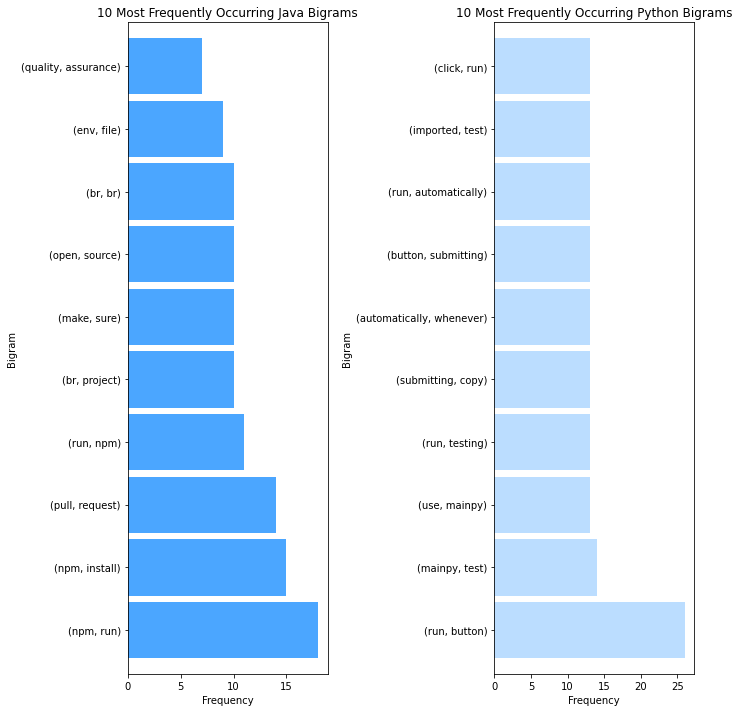

In [30]:
plt.subplot(121)
java_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(12, 8), alpha=.8)
plt.title('10 Most Frequently Occurring Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
python_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('10 Most Frequently Occurring Python Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Frequency')

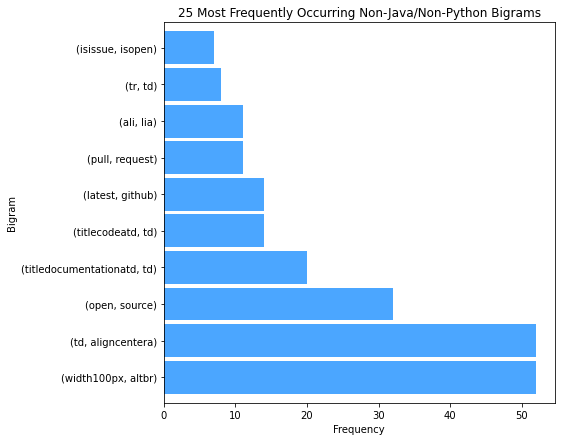

In [31]:
other_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(7, 7), alpha=.8)
plt.title('25 Most Frequently Occurring Non-Java/Non-Python Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

{'npm run': 18, 'npm install': 15, 'pull request': 14, 'run npm': 11, 'br project': 10, 'make sure': 10, 'open source': 10, 'br br': 10, 'env file': 9, 'quality assurance': 7}


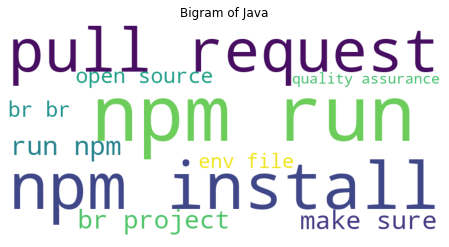

In [32]:
bg = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(bg)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Bigram of Java')
plt.axis('off')
print(bg)

{'run button': 26, 'mainpy test': 14, 'use mainpy': 13, 'run testing': 13, 'submitting copy': 13, 'automatically whenever': 13, 'button submitting': 13, 'run automatically': 13, 'imported test': 13, 'click run': 13}


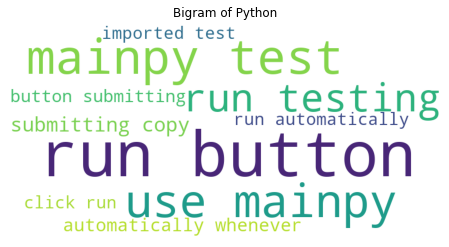

In [33]:
bg2 = {k[0] + ' ' + k[1]: v for k, v in python_bigrams.to_dict().items()}
img2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(bg2)
plt.figure(figsize=(8, 4))
plt.imshow(img2)
plt.title('Bigram of Python')
plt.axis('off')
print(bg2)

In [34]:
from PIL import Image
import numpy as np

In [35]:
mask = np.array(Image.open('imac-og-202008.jpeg'))

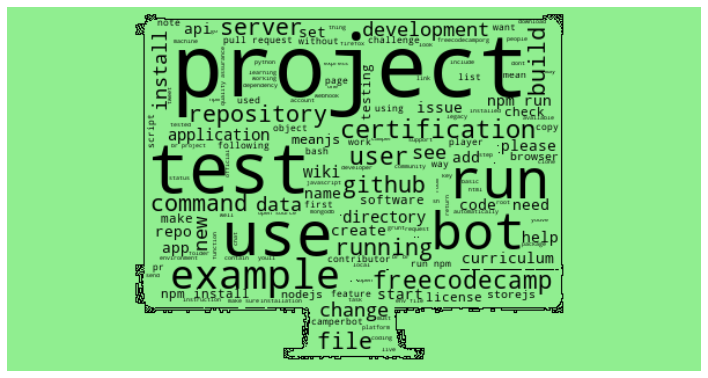

In [36]:
wc = WordCloud(background_color='lightgreen', mask=mask, mode='RGB', color_func = lambda *args, **kwargs: "black", width=1000, max_words=200, height=1000, random_state=1,
              contour_width = .1, contour_color = 'black')
wc.generate(java_words)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

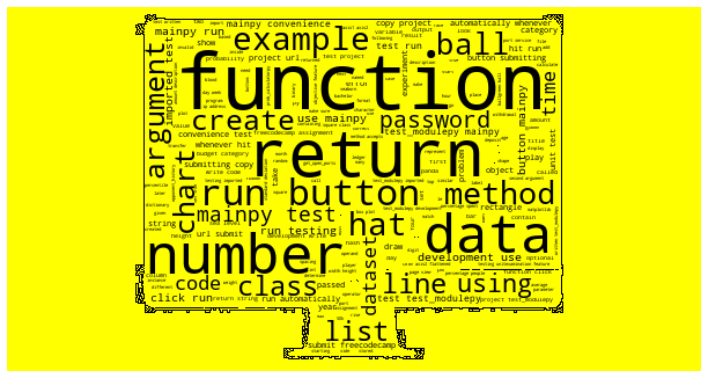

In [37]:
wc = WordCloud(background_color='yellow', mask=mask, mode='RGB', color_func = lambda *args, **kwargs: "black", width=1000, max_words=200, height=1000, random_state=1,
              contour_width = .1, contour_color = 'black')
wc.generate(python_words)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()